In [1]:
#60MA策略，股價大於60日平均線買進

In [2]:
from pandas_datareader import data 
import matplotlib.pyplot as plt    
import pandas as pd                
%matplotlib inline

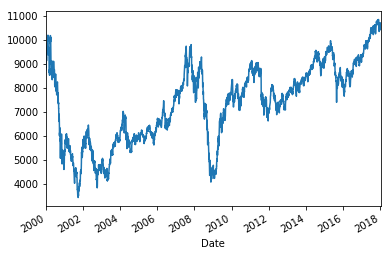

In [3]:
#抓取台灣指數

data = data.DataReader("^TWII", "yahoo", "2000-01-01","2018-01-01")
c = data['Close']
c.plot()

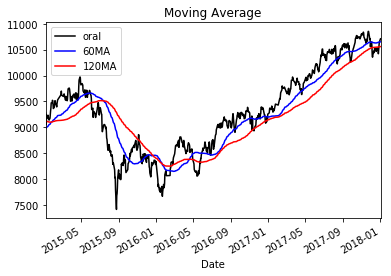

In [4]:

# 近60日收盤
c60 = c.rolling(60).mean()
c120 = c.rolling(120).mean()
plt.title("Moving Average")
c['2015':].plot(color='black')
c60['2015':].plot(color='blue')
c120['2015':].plot(color='red')
plt.legend(['oral','60MA','120MA'])

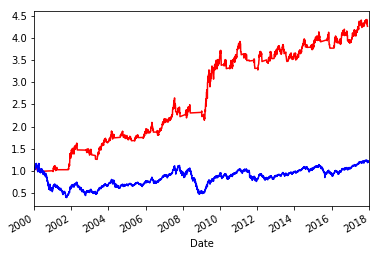

In [5]:
#backtest

# 近60日收盤
c60 = c.rolling(60, min_periods=1).mean()

# 買入訊號
signal = (c > c60)

# 與大盤比較績效
(c.shift(-1) / c)[signal].cumprod().plot(color='red')
(c.shift(-1) / c).cumprod().plot(color='blue')


In [6]:
pd.DataFrame({'origin':c, '60MA':c60, '是否買進':signal , '增長率':c.shift(-1)/c,'總報酬率':(c.shift(-1) / c)[signal].cumprod()}).tail(50)

,origin,60MA,是否買進,增長率,總報酬率
Date,,,,,
2017-10-24,10743.780273,10512.728841,True,1.000632,4.377324
2017-10-25,10750.570312,10518.187516,True,0.998529,4.370886
2017-10-26,10734.759766,10523.311344,True,0.997611,4.360443
2017-10-27,10709.110352,10527.841683,True,1.004460,4.379889
2017-10-30,10756.870117,10531.801693,True,1.003433,4.394926
2017-10-31,10793.799805,10537.200358,True,1.001164,4.400040
2017-11-01,10806.360352,10542.197038,True,0.998348,4.392772
2017-11-02,10788.509766,10545.682536,True,1.001136,4.397764
2017-11-03,10800.769531,10549.545866,True,0.998650,4.391827


In [7]:
#60MA個股回測
#提取資料
import sqlalchemy
from sqlalchemy import create_engine
def get_data_sql(sql_cmd):
   
    engine = create_engine("mysql+pymysql://{}:{}@{}/{}?charset={}".format('root', 'mysql', '127.0.0.1:3306', 'test','utf8'))
    # sql 命令
    sql = sql_cmd      
    df = pd.read_sql(sql=sql_cmd, con=engine)    
    return df

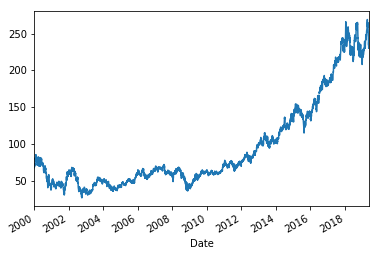

In [8]:
df = get_data_sql("SELECT * FROM stock_price WHERE StockID = 2330" )
data = df.set_index(['Date'])
c = data['Close']
c.plot()

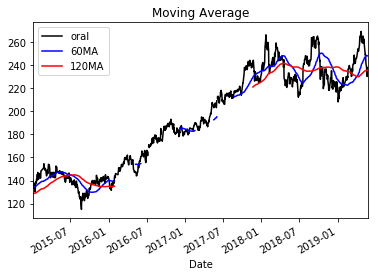

In [9]:

# 近60日收盤
c60 = c.rolling(60).mean()
c120 = c.rolling(120).mean()
plt.title("Moving Average")
c['2015':].plot(color='black')
c60['2015':].plot(color='blue')
c120['2015':].plot(color='red')
plt.legend(['oral','60MA','120MA'])

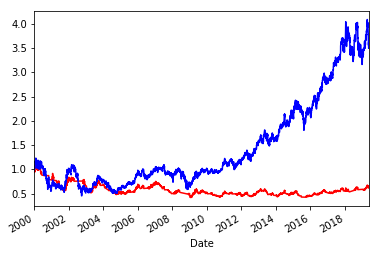

In [10]:
#backtest

# 近60日收盤
c60 = c.rolling(60, min_periods=1).mean()

# 買入訊號
signal = (c > c60)

# 與大盤比較績效
(c.shift(-1) / c)[signal].cumprod().plot(color='red')
(c.shift(-1) / c).cumprod().plot(color='blue')


In [11]:
pd.DataFrame({'origin':c, '60MA':c60, '是否買進':signal , '增長率':c.shift(-1)/c,'總報酬率':(c.shift(-1) / c)[signal].cumprod()}).tail(50)

,origin,60MA,是否買進,增長率,總報酬率
Date,,,,,
2019-03-14,234.5,225.075000,True,1.019190,0.598363
2019-03-15,239.0,225.391667,True,1.008368,0.603370
2019-03-18,241.0,225.725000,True,0.997925,0.602119
2019-03-19,240.5,226.083333,True,1.006237,0.605874
2019-03-20,242.0,226.408333,True,1.014463,0.614637
2019-03-21,245.5,226.725000,True,1.012220,0.622147
2019-03-22,248.5,227.100000,True,0.971831,0.604622
2019-03-25,241.5,227.416667,True,1.010352,0.610881
2019-03-26,244.0,227.758333,True,0.989754,0.604622


In [12]:
#60MA策略可能比較適合用在台灣加權指數